# Start configurtion for Agents
This notebook creates a .csv file with all relevant information for the simulation. For every angent, a name, the type and a random starting point within the area is created and writen to the file.

In the 3rd cell the relevant information can be configured 

In [1]:
!pip install geopandas

In [3]:
import os
os.environ['USE_PYGEOS'] = '0'

import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import numpy as np
#import shapely
from shapely.geometry import Point
#import random

## Possible configurations within this notebook:
 - `number_of_startpositions`: defines the number of generated starting positions 
 - `path` the path where the .geojson file is located and the generated .csv should be
 - `file` the name of a .geojson file which defines the area the signals should be in

In [4]:
# If you see the following error, it can be ignored:
# `ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed`
number_of_startpositions = 15
path = './DroneSimulation/Resources/'
file = 'area.geojson'

res: str = path+ file
area = geopandas.read_file(res)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
points = []
bounds = area.bounds.values[0]
minx = bounds[0]
miny = bounds[1]
maxx = bounds[2]
maxy = bounds[3]
while len(points) < number_of_startpositions:
    pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
    if area.contains(pnt)[0]:
        points.append(pnt)

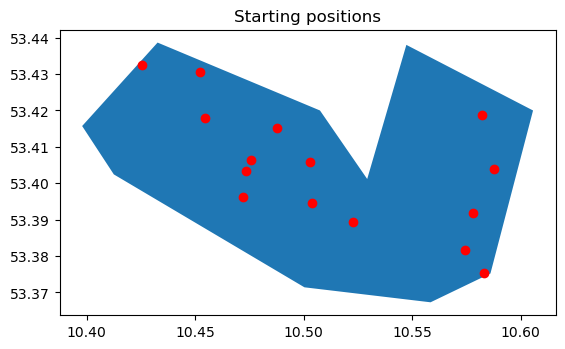

In [6]:
# Plot the polygon
area.plot()

# Plot the list of points
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.title("Starting positions")
plt.scatter(xs, ys,color="red")
plt.show()

In [7]:
positions_dict= {'Latitude':[],'Longitude':[], 'DroneName': [], 'DroneTypeString':[]}
name_count = 1

for i in points:
    positions_dict['Latitude'].append(i.y)
    positions_dict['Longitude'].append(i.x)
    positions_dict['DroneName'].append("Drone_" + str(name_count))
    positions_dict['DroneTypeString'].append("Drone")
    name_count += 1
    

In [21]:
df = pd.DataFrame(positions_dict)
df.to_csv(path +'start_positions.csv',sep=';', index=False, header=True)